# Plotting model performance on data with more layers

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Fold 0 - MSE: 0.0745, R2: 0.5861
Fold 1 - MSE: 0.0688, R2: 0.5754
Fold 2 - MSE: 0.0701, R2: 0.5425
Fold 3 - MSE: 0.0925, R2: 0.4703
Fold 4 - MSE: 0.0772, R2: 0.5672
MSE: 0.07453334163303757; R2: 0.5861354807349327
Evaluation of best model - MSE: 0.0745, R2: 0.5861
[ 1.18222406e+00 -1.77374124e-04  1.32822340e-02 -1.41899299e-03
 -4.74819524e-02 -1.41899299e-03  1.67815146e-02  6.86371319e-02
 -1.27751217e-01  9.66476176e-03  3.26678087e-02]
-0.08648342897062664
Fold 0 - MSE: 0.0742, R2: 0.5881
Fold 1 - MSE: 0.0857, R2: 0.4708
Fold 2 - MSE: 0.0689, R2: 0.5503
Fold 3 - MSE: 0.0873, R2: 0.4997
Fold 4 - MSE: 0.0857, R2: 0.5199
MSE: 0.07417086498915103; R2: 0.5881482205193035
Evaluation of best model - MSE: 0.0742, R2: 0.5881
Best model - MSE: 0.0987, R2: 0.4469
Evaluation of best model - MSE: 0.0639, R2: 0.5671


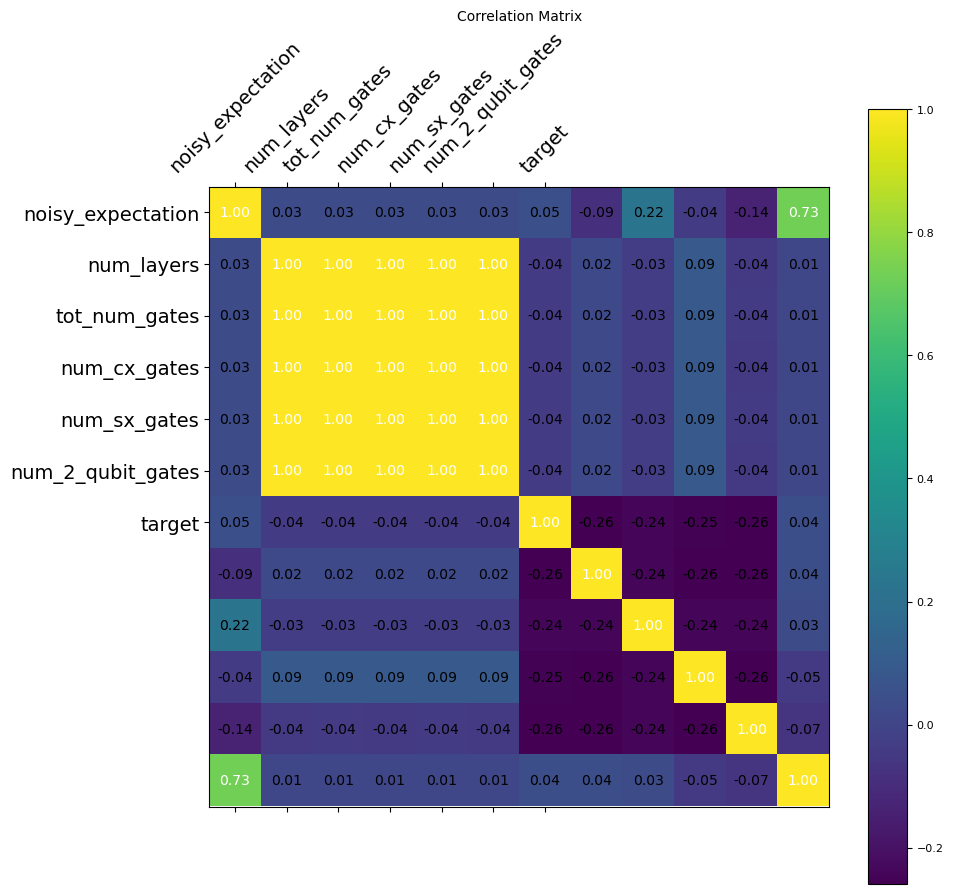

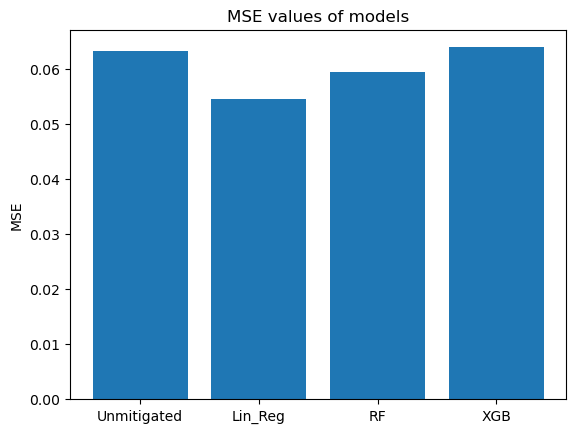

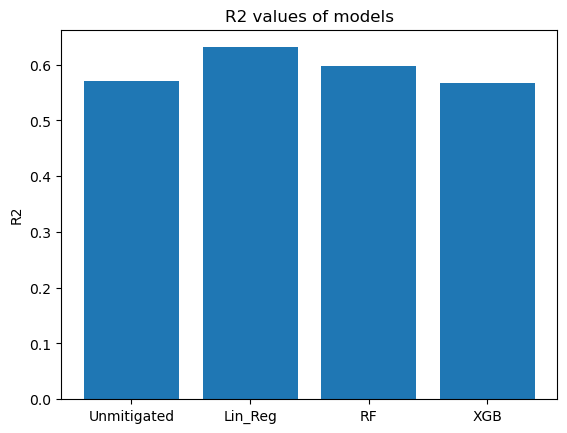

[[ 1.1216646e+00 -2.4618697e-03 -2.8624609e-03 -2.7975920e-03]
 [-5.2955630e-03  1.1233268e+00 -2.4385452e-03 -1.4796257e-03]
 [-3.6180143e-03 -2.8818250e-03  1.1190038e+00  1.6742945e-04]
 [-2.3743168e-03 -3.0452609e-03  1.2800395e-03  1.1206498e+00]]
[0.05158463 0.05154502 0.04959808 0.05179308]
4
[[ 1.18548416e-01  1.18257593e+03 -9.82019226e+02 -5.46583801e+02
   6.10162842e+02 -2.57740097e+01  1.13295586e+02  6.24128990e+01
   1.19206190e-01  9.28202534e+00 -5.80216217e+00  1.98043495e-01
  -8.11017305e-02 -1.19184509e-01  3.83766603e+00 -4.35951352e-01
   6.61582828e-01  3.45385671e-02  1.50988388e+00 -2.33279407e-01
   1.13362503e+00 -1.71931815e+00  1.07566476e+00  2.65684217e-01
  -2.08727866e-01 -3.98831278e-01 -1.50471002e-01 -2.30469838e-01
  -2.82462597e-01 -2.32461512e-01 -2.07878441e-01 -2.01910123e-01
  -1.65400624e-01 -7.12280273e-02 -3.05076599e-01 -2.18627930e-01
  -4.36630249e-02 -1.41391754e-02 -2.12768555e-01 -1.62778854e-01
  -9.89379883e-02  3.99780273e-02 -1.71

In [2]:
%run dataset.ipynb  # allows to use defined functions from other notebook

### for now used eval dataset produced from old pickle files -> generate new ones with different number of layers

In [3]:
model_lr, _, _ = Linear_Reg()
model_rf, _, _ = Random_Forest()

_, new_pickle_files = split_data() # path to pickle files with different num_layers
y_eval_ipol = file_to_data(new_pickle_files)    # is df
y_ipol_pred_lr = model_lr.predict(y_eval_ipol.drop(columns='target'))
y_ipol_pred_rf = model_rf.predict(y_eval_ipol.drop(columns='target'))


Fold 0 - MSE: 0.0745, R2: 0.5861
Fold 1 - MSE: 0.0688, R2: 0.5754
Fold 2 - MSE: 0.0701, R2: 0.5425
Fold 3 - MSE: 0.0925, R2: 0.4703
Fold 4 - MSE: 0.0772, R2: 0.5672
Fold 0 - MSE: 0.0739, R2: 0.5894
Fold 1 - MSE: 0.0838, R2: 0.4829
Fold 2 - MSE: 0.0649, R2: 0.5765
Fold 3 - MSE: 0.0859, R2: 0.5076
Fold 4 - MSE: 0.0835, R2: 0.5321


Text(0.5, 1.0, 'Error interpolation of models')

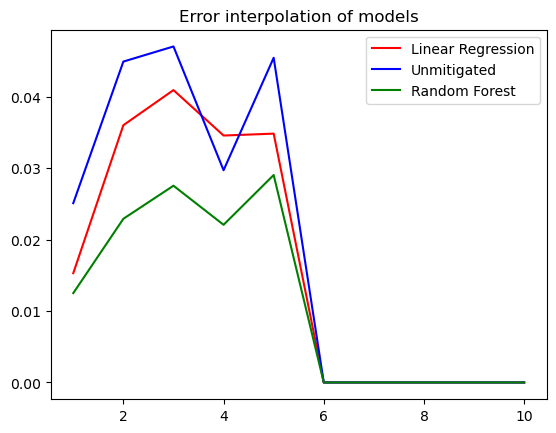

In [7]:
error_arr_unmi = []
error_arr_lr = []
error_arr_rf = []

x = range(1,11)

for j in x:
    # calculate errors for each number of layer
    y_cor_layers = y_eval_ipol['num_layers'] == j
    y_cor_layers_pred_lr = y_ipol_pred_lr[np.array(y_cor_layers)]
    y_cor_layers_pred_rf = y_ipol_pred_rf[np.array(y_cor_layers)]
    y_cor_layers_target = y_eval_ipol[np.array(y_cor_layers)]['target']
    
    # calculate mean error of unmitigated model
    error_unmi = sum(np.abs(y_eval_ipol[np.array(y_cor_layers)]['noisy_expectation'] - y_cor_layers_target))
    error_unmi /= len(y_cor_layers)
    error_arr_unmi.append(error_unmi)
    
    # calculate mean error of LR model
    error = sum(np.abs(y_cor_layers_pred_lr - y_cor_layers_target))
    error /= len(y_cor_layers)
    error_arr_lr.append(error)

    # calculate mean error of RF model
    error = sum(np.abs(y_cor_layers_pred_rf - y_cor_layers_target))
    error /= len(y_cor_layers)
    error_arr_rf.append(error)


plt.plot(x, error_arr_lr, color='red', label = 'Linear Regression')
plt.plot(x, error_arr_unmi, color='blue', label = 'Unmitigated')
plt.plot(x, error_arr_rf, color='green', label = 'Random Forest')
plt.legend()
plt.title('Error interpolation of models')
